In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(20800, 5)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df1 = df.dropna()
df1.reset_index(drop=True)
df1.shape

(18285, 5)

In [6]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

0    10361
1     7924
Name: label, dtype: int64
0: Reliable
1: Unreliable


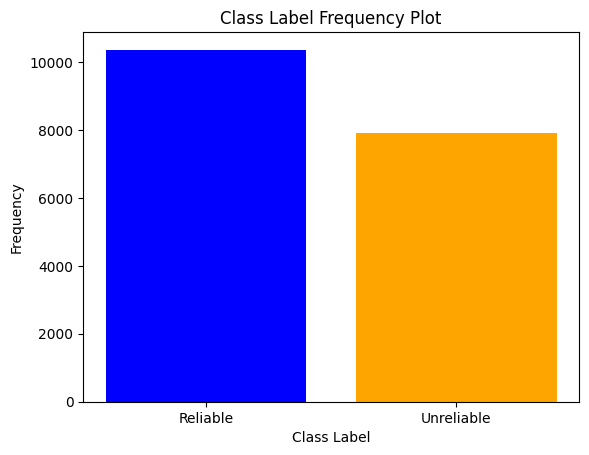

In [7]:
class_label_counts = y.value_counts()
print(class_label_counts)
print("0: Reliable\n1: Unreliable")
plt.bar(['Reliable', 'Unreliable'], class_label_counts.values, color=['blue', 'orange'])

plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Class Label Frequency Plot')
plt.show()


In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Preprocessing

In [10]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
corpus = []
for i in range(len(x)):
    review = re.sub('[^A-Za-z]',' ',x.iloc[i,1]) # title
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)




In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [12]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [13]:
voc_size = 5000
onehot_arr = [one_hot(sent, voc_size) for sent in corpus]
onehot_arr

[[4760, 1847, 1816, 440, 2877, 481, 1174, 2486, 2513, 2726],
 [533, 1409, 1016, 2886, 4236, 3438, 2994],
 [1323, 1293, 4935, 208],
 [4588, 2569, 4420, 2010, 1571, 4020],
 [555, 4236, 4084, 3015, 254, 3255, 4236, 2170, 3255, 3776],
 [3231,
  4901,
  1643,
  3043,
  4910,
  1436,
  862,
  11,
  87,
  1509,
  2872,
  2465,
  4418,
  129,
  2994],
 [4982, 839, 3570, 902, 3968, 4306, 134, 4000, 4676, 4781, 4892],
 [113, 1752, 4480, 1394, 205, 543, 1436, 336, 4676, 4781, 4892],
 [1827, 1263, 1325, 3931, 3171, 926, 4805, 1895, 1436, 2465],
 [3801, 1672, 1080, 1410, 878, 1472, 916, 686],
 [4126, 921, 1929, 3776, 1704, 3610, 848, 4783, 4956, 3730, 306],
 [2010, 3548, 2877, 926, 1436, 205],
 [1488, 4947, 2856, 4832, 1679, 946, 1020, 4226, 1038],
 [4463, 3441, 296, 305, 2865, 4383, 4388, 4676, 4781, 4892],
 [2165, 2210, 773, 2567, 2426, 4676, 4781, 4892],
 [3892, 4397, 4256, 4453, 2007, 1731, 4439, 4584, 3107, 4651],
 [1593, 89, 1409],
 [3420, 696, 2806, 1189, 1436, 2807, 3405, 2994],
 [1024, 270

# Padding

In [14]:
# making all arrays of fixed length
sent_length = 20
padded_arr = pad_sequences(onehot_arr, padding='pre', maxlen=sent_length)
padded_arr

array([[   0,    0,    0, ..., 2486, 2513, 2726],
       [   0,    0,    0, ..., 4236, 3438, 2994],
       [   0,    0,    0, ..., 1293, 4935,  208],
       ...,
       [   0,    0,    0, ..., 4676, 4781, 4892],
       [   0,    0,    0, ...,  235, 1257, 4821],
       [   0,    0,    0, ..., 1079, 2297, 4843]], dtype=int32)

In [15]:
emb_vec_size = 50
model = Sequential()
model.add(Embedding(voc_size, emb_vec_size, input_length= sent_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 50)            250000    
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 310501 (1.18 MB)
Trainable params: 310501 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(padded_arr), np.array(y), test_size=0.25, random_state=42)

# Training Model

In [22]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
215/215 [==============================] - 2s 11ms/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 0.6548 - val_accuracy: 0.9079
Epoch 2/10
215/215 [==============================] - 2s 8ms/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.6322 - val_accuracy: 0.9009
Epoch 3/10
215/215 [==============================] - 2s 8ms/step - loss: 0.0066 - accuracy: 0.9982 - val_loss: 0.6194 - val_accuracy: 0.9097
Epoch 4/10
215/215 [==============================] - 2s 9ms/step - loss: 0.0056 - accuracy: 0.9986 - val_loss: 0.6545 - val_accuracy: 0.9108
Epoch 5/10
215/215 [==============================] - 2s 9ms/step - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.7016 - val_accuracy: 0.9084
Epoch 6/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.6687 - val_accuracy: 0.9097
Epoch 7/10
215/215 [==============================] - 2s 8ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.6724 - val_accuracy: 0.9044
Epoch

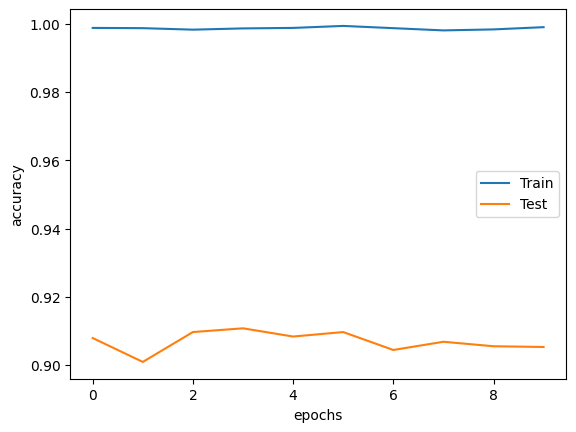

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()


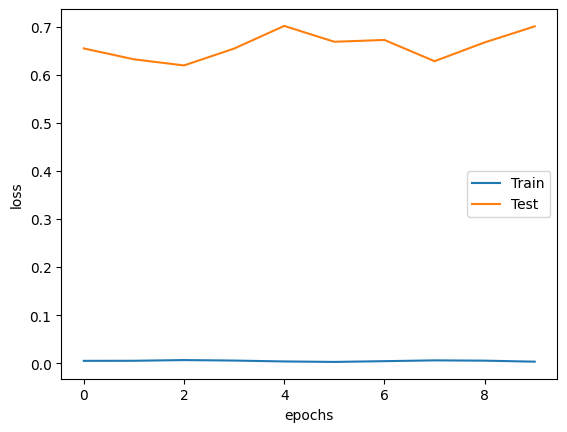

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train','Test'])
plt.show()


In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
print('Accuracy: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


143/143 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      2600
           1       0.87      0.92      0.89      1972

    accuracy                           0.91      4572
   macro avg       0.90      0.91      0.90      4572
weighted avg       0.91      0.91      0.91      4572

Accuracy:  0.9052930883639545
[[2329  271]
 [ 162 1810]]
